In [1]:
#######################
##TSP Solver Function##
#######################

import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

class TSPSolve:
    def __init__(self, points, metric='euclidean'):
        self.points = points
        self.metric = metric

    def solve(self):
        nrow = np.shape(self.points)[0]
        dist = distance.cdist(self.points, self.points, self.metric)
        np.fill_diagonal(dist, np.inf)
        solution = [0]
        unvisited = list(range(1, nrow))
        for count in range(nrow - 1):
            i = solution[-1]
            k = min(unvisited, key=lambda x: dist[i][x])
            solution.append(k)
            unvisited.remove(k)
        return solution

    def cost_function(self, solution):
        cost = []
        dist = distance.cdist(self.points, self.points, self.metric)
        solution_int = list(map(int, solution))

        for i in range(len(solution) - 1):
            index = solution_int[i:i + 2]
            c = dist[index[0], index[1]]
            cost.append(c)
        index = list(solution_int[len(solution_int) - 1:len(solution_int) + 1])
        index.append(solution_int[0])
        c = dist[index[0], index[1]]
        cost.append(c)
        Tcost = np.sum(cost)
        return Tcost

    def two_opt(self, solution, improvement_threshold=0.001):
        cities = self.points

        def plot(route, step_distance, best_distance):
            color_list = ['green' if i == route[0] else 'red' if i == route[-1] else 'blue' for i in range(len(cities))]

            plt.figure(figsize=(8, 6))
            plt.scatter(cities[:, 0], cities[:, 1], c=color_list, marker='o', s=100, zorder=2)

            for i in range(len(route) - 1):
                plt.arrow(cities[int(route[i]), 0], cities[int(route[i]), 1],
                          cities[int(route[i + 1]), 0] - cities[int(route[i]), 0],
                          cities[int(route[i + 1]), 1] - cities[int(route[i]), 1],
                          color='black', linewidth=0.5, head_width=0.02, head_length=0.02, zorder=1)

            plt.arrow(cities[int(route[-2]), 0], cities[int(route[-2]), 1],
                      cities[int(route[-1]), 0] - cities[int(route[-2]), 0],
                      cities[int(route[-1]), 1] - cities[int(route[-2]), 1],
                      color='black', linewidth=0.5, head_width=0.02, head_length=0.02, zorder=1)

            plt.scatter(cities[int(route[0]), 0], cities[int(route[0]), 1], color='green', s=150, zorder=3)
            plt.scatter(cities[int(route[-1]), 0], cities[int(route[-1]), 1], color='red', s=150, zorder=3)

            plt.title("TSP Solution\nStep Distance: {}".format(step_distance), fontsize=18)
            plt.xlabel("X Coordinate")
            plt.ylabel("Y Coordinate")
            plt.show()

        def two_opt_swap(r, i, k):
            return np.concatenate((r[0:i], r[k:-len(r) + i - 1:-1], r[k + 1:len(r)]))

        route = solution
        best_distance = self.cost_function(route)

        plot(route, best_distance, best_distance)

        improvement_factor = 1
        while improvement_factor > improvement_threshold:
            distance_to_beat = best_distance

            for swap_first in range(1, len(route) - 2):
                for swap_last in range(swap_first + 1, len(route)):
                    new_route = two_opt_swap(route, swap_first, swap_last)
                    new_distance = self.cost_function(new_route)
                    if new_distance < best_distance:
                        route = new_route
                        best_distance = new_distance

            improvement_factor = 1 - best_distance / distance_to_beat
            print("Improvement factor:", improvement_factor)
            plot(route, best_distance, best_distance)

        self.best_distance = best_distance 
        return route


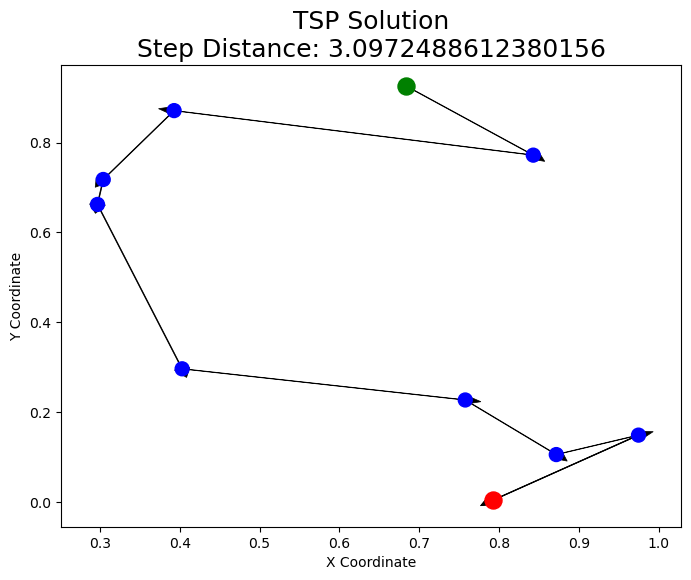

Improvement factor: 0.012874201345836056


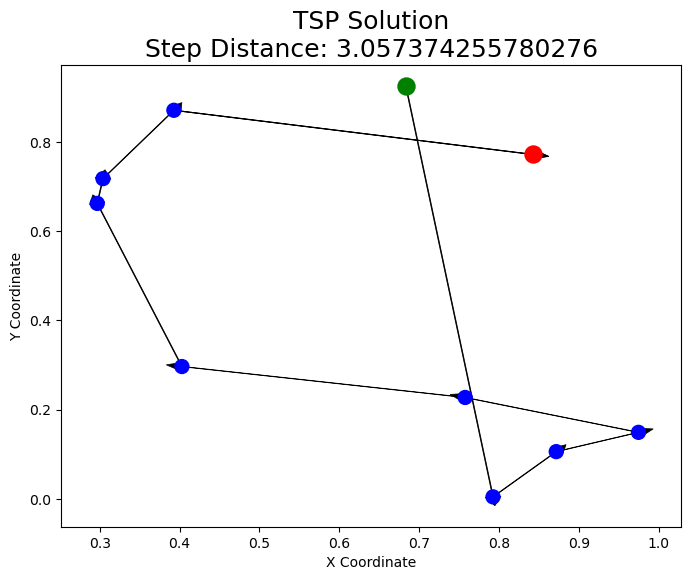

Improvement factor: 0.15103674437011327


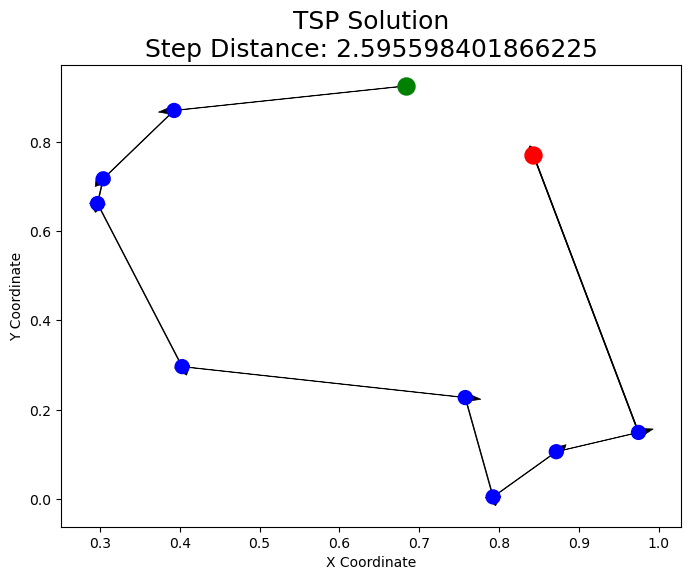

Improvement factor: 0.0


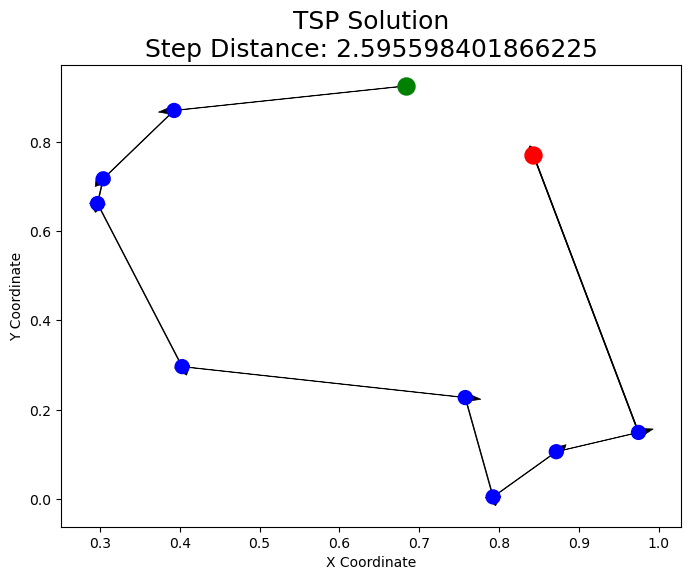

Optimal Solution:  [0. 1. 8. 7. 2. 9. 3. 6. 4. 5.]
Best Distance:  2.595598401866225


In [2]:
# Testing the function
points = np.random.rand(10, 2)
tsp_solver = TSPSolve(points)
solution = tsp_solver.solve()
opt = tsp_solver.two_opt(solution)

print("Optimal Solution: ", opt)
print("Best Distance: ", tsp_solver.best_distance)

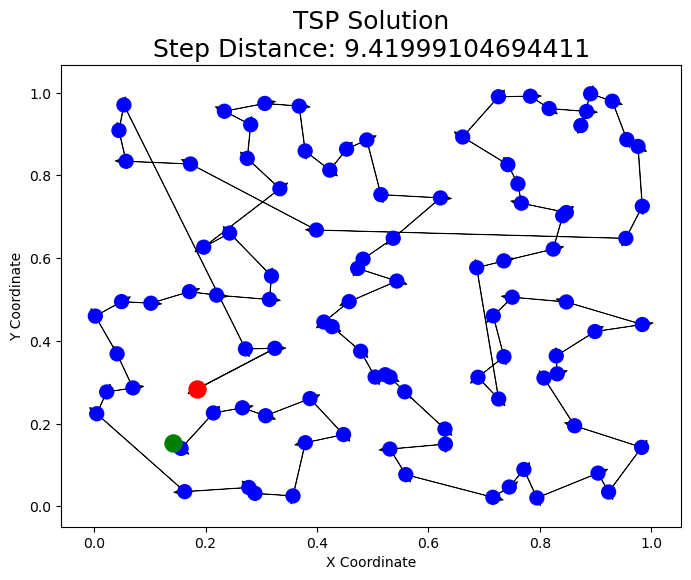

Improvement factor: 0.07198961999304998


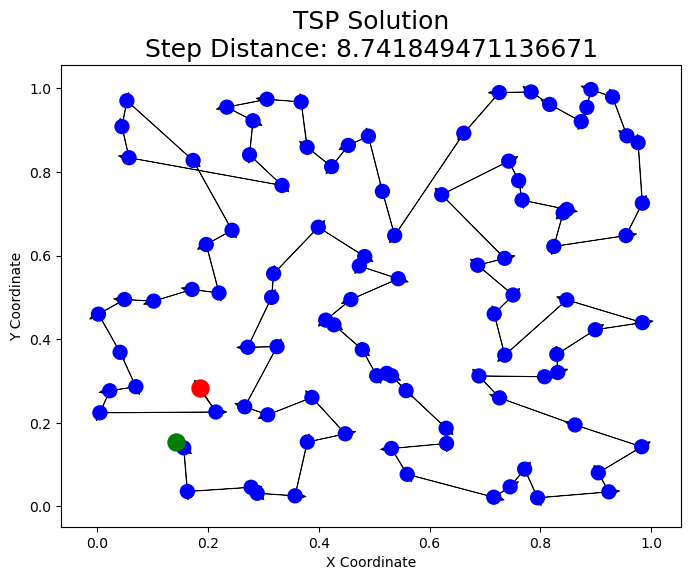

Improvement factor: 0.03364039641081118


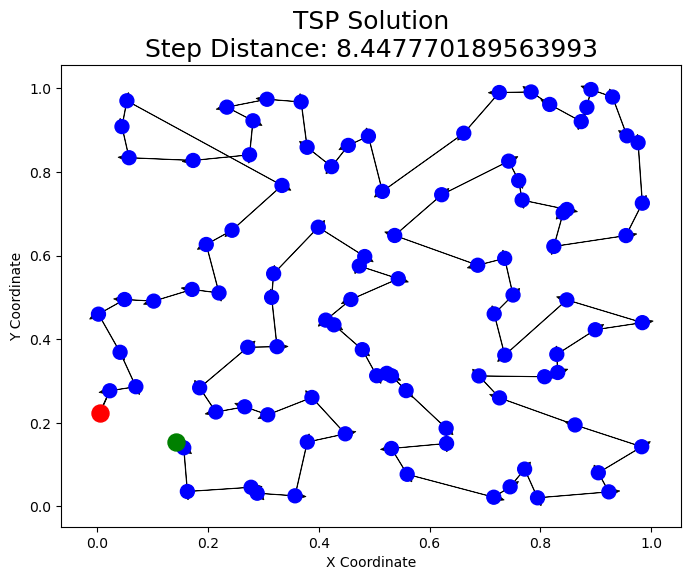

Improvement factor: 0.02010411958053815


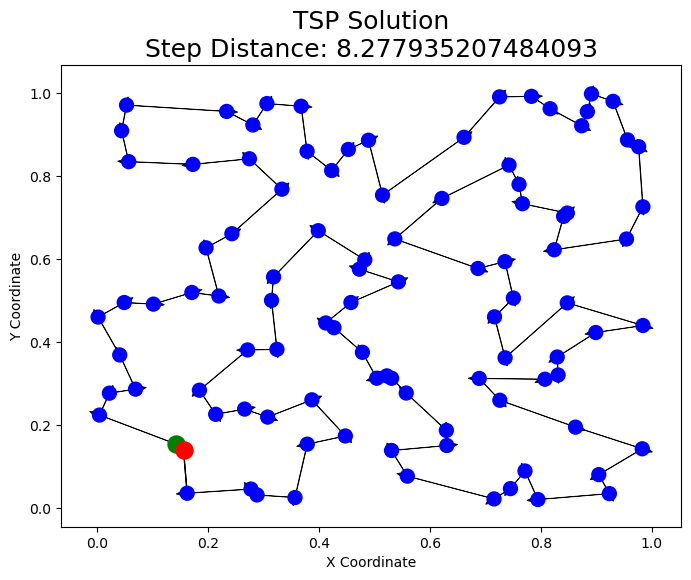

Improvement factor: 0.0


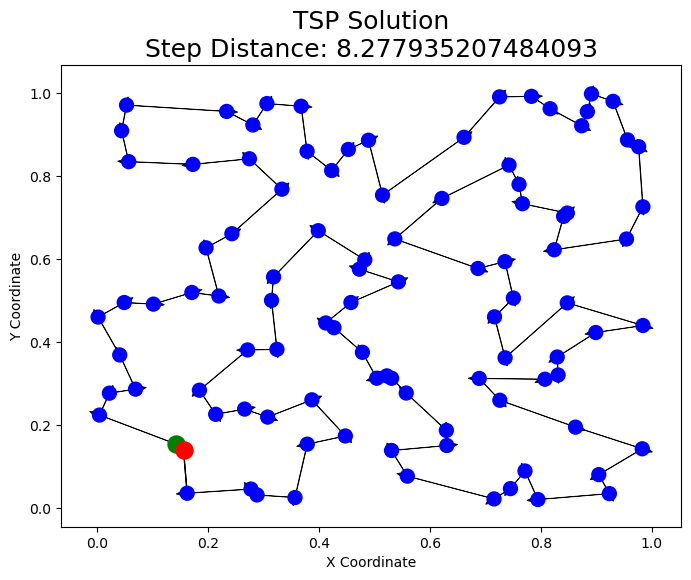

Optimal Solution:  [ 0 18 43 96 19 71 32  9 62 98 46 42 85 59 76 38  4 23 57 83 95 70 12 66
 72  6 39 53 13 97  5 16 75 55 79 60 34 14 77  8 51 84  3 10 44 89 94 63
 31 40 28 58 67 35 56  1 86  2 49 24 17 54 52 50 88 15 25 65 68 26 22 27
 80 47 37 64 78 73 92 90 87 41 61 36 81  7 29 45 48 74 30 33 21 99 93 82
 20 69 91 11]
Best Distance:  8.277935207484093


In [3]:
# Testing the function
points = np.random.rand(100, 2)
tsp_solver = TSPSolve(points)
solution = tsp_solver.solve()
opt = tsp_solver.two_opt(solution)

print("Optimal Solution: ", opt)
print("Best Distance: ", tsp_solver.best_distance)

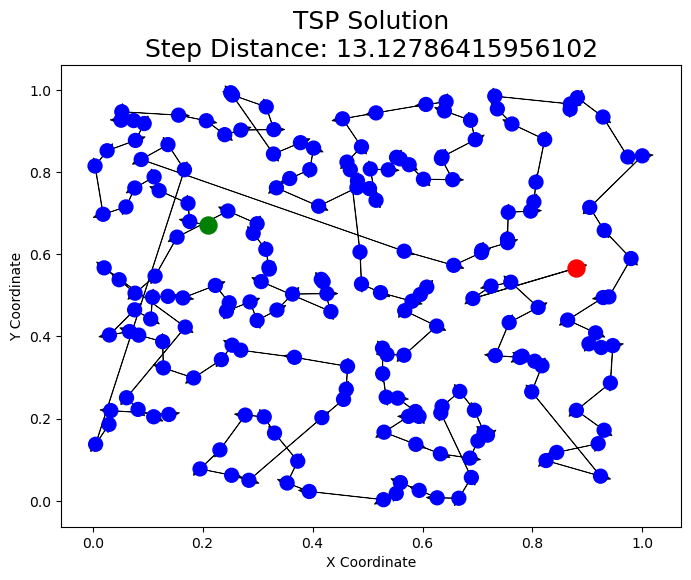

Improvement factor: 0.09930774463067704


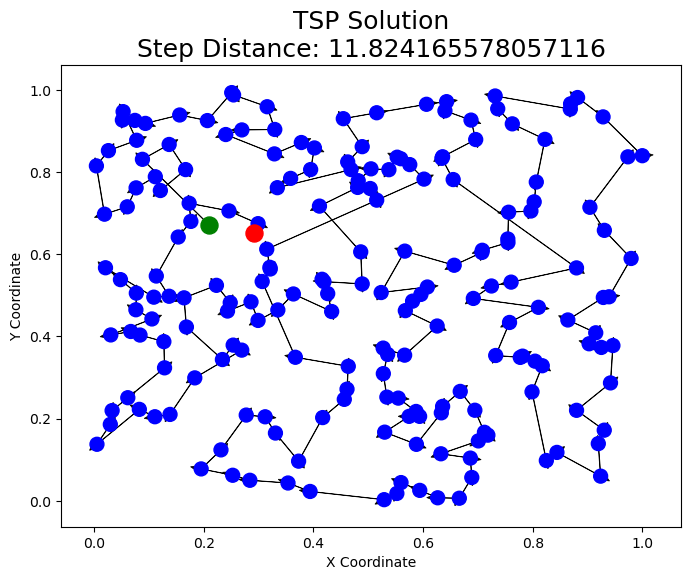

Improvement factor: 0.039600053319585715


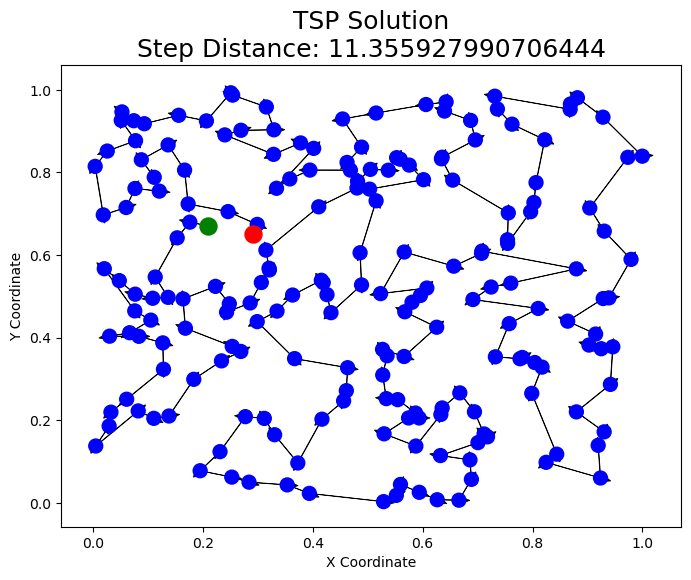

Improvement factor: 0.007089078436118834


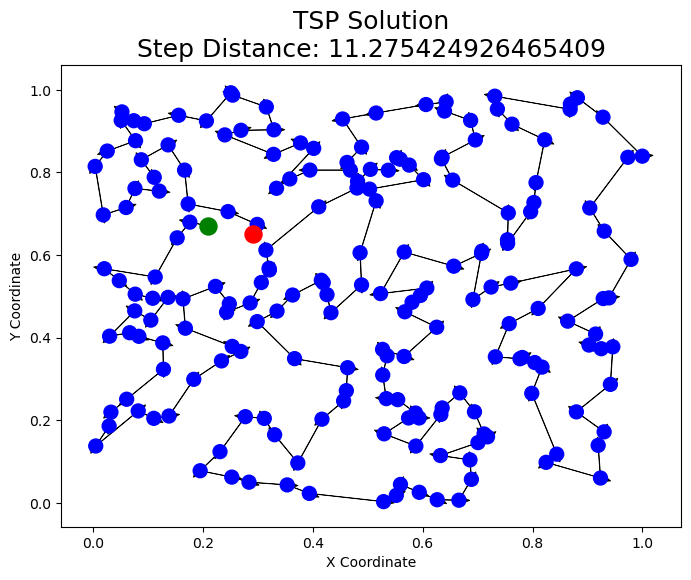

Improvement factor: 0.00016277082324001046


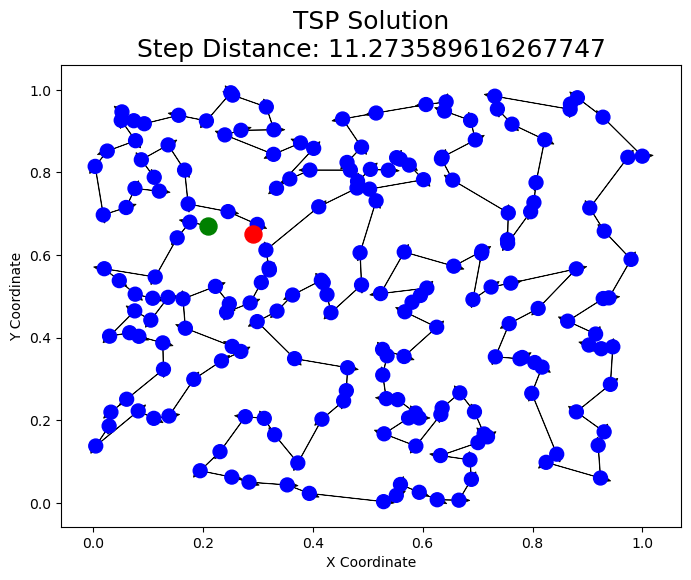

Optimal Solution:  [  0 139 170 179 189 172 110  33 145 130 106 131  96 123 163  44 178 176
  61 101 107 195 114 104 119 181  28 127  31  98  34 120  71   4  59  58
 112   6 152  50  21  63  13  14   7  45  74  22 169  72  65  75 103 141
   2  78 193 122 157 143 199 148  86  52 171 153 156 150  85 180  11 136
 102 108  97  42 194  36  64  70 197 166   5 118 116 184 140 177  38 113
 165  79 151  93  47  99 133 126 100  17 149  48  54 190   3  69  43 155
 132  68   8 192  16 183  53  90  81  12  84  95  30  56 111 137 109  89
  60 128 162  82 154 182  55  20 158  10 175  94 161  62 159  19 129  25
  32  37 125 142 191 160 174  41  29 168 188  18 147 105  40  24 144  66
  49  92  77  46  35   1  57 121 146 117 124  83  39 196  67 164  80  15
  51  87  23 167 135  91  27  76 186 138 134  88  73  26 185 198   9 173
 115 187]
Best Distance:  11.273589616267747


In [4]:
# Testing the function
points = np.random.rand(200, 2)
tsp_solver = TSPSolve(points)
solution = tsp_solver.solve()
opt = tsp_solver.two_opt(solution)

print("Optimal Solution: ", opt)
print("Best Distance: ", tsp_solver.best_distance)